In [2]:
%pip install mysql


Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install mysqlclient
%pip install sql alchemy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


1)**BUSINESS UNDERSTANDING**

This project aims to take a dive into the Indian startup ecosystem using data from 2018 to 2021. Upon cleaning and processing the data,it goes ahead and tests the following hypothesis:

**Null Hypothesis (Ho):**  The sector of a startup has no significant influence on the funding it receives.

**Alternate Hypothesis (Ha):** The sector of a startup has significant influence the funding it receives.


The data is then analyzed and the following questions disected:

1.	How is funding spread across the years?
2.	What are the dominant sectors within the Indian startup ecosystem across the years?
3.	Are there any emerging sectors that have shown a significant increase in funding year over year?
4.	Where in India could be considered the surviving grounds for startups?
5.	Is there a relationship between what a startup does and the funding it receives?

2)**DATA UNDERSTANDING & PRE-PROCESSING**

*Import modules*

In [4]:

import pyodbc  # just installed with pip
# import the dotenv_values function from the dotenv package
from dotenv import dotenv_values
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np

*Connect to databases*

In [6]:
environment_variables = dotenv_values('.env')
# Access login credentials from  the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

In [7]:
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [8]:
con = pyodbc.connect(connection_string)

In [9]:
query1 = "Select * from dbo.LP1_startup_funding2020"
query2 = "Select * from dbo.LP1_startup_funding2021"

In [10]:
df_2020 = pd.read_sql(query1, con)
df_2021 = pd.read_sql(query2, con)

**2020 Data**

In [11]:
df_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [12]:
# Add year column to dataframe
df_2020["year"] = 2020
df_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020


In [13]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
 10  year           1055 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 90.8+ KB


In [14]:
df_2020.drop(columns="column10", inplace=True)

In [15]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   year           1055 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 82.5+ KB


**2021 Data**

In [16]:
df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [17]:
# Add year column to data frame
df_2021["year"] = 2021
df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


Preview of columns for 2020 & 2021 data

In [18]:
df_2020.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'year'],
      dtype='object')

In [19]:
df_2021.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'year'],
      dtype='object')

In [20]:
df_2020['Amount'].median()

3000000.0

In [21]:
df_2020['Amount'].isna().sum()

254

In [22]:
df_2020['Amount']=df_2020['Amount'].fillna(df_2020['Amount'].median())

In [23]:
df_2020['Amount'].isna().sum()

0

In [24]:
df_2020['Amount'].unique()

array([2.0000000e+05, 1.0000000e+05, 3.0000000e+06, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 1.0000000e+07,
       1.4500000e+08, 1.0000000e+08, 2.1000000e+07, 4.0000000e+06,
       2.0000000e+07, 5.6000000e+05, 2.7500000e+05, 4.5000000e+06,
       1.5000000e+07, 3.9000000e+08, 7.0000000e+06, 5.1000000e+06,
       7.0000000e+08, 2.3000000e+06, 7.0000000e+05, 1.9000000e+07,
       9.0000000e+06, 4.0000000e+07, 7.5000000e+05, 1.5000000e+06,
       7.8000000e+06, 5.0000000e+07, 8.0000000e+07, 3.0000000e+07,
       1.7000000e+06, 2.5000000e+06, 4.0000000e+04, 3.3000000e+07,
       3.5000000e+07, 3.0000000e+05, 2.5000000e+07, 3.5000000e+06,
       2.0000000e+08, 6.0000000e+06, 1.3000000e+06, 4.1000000e+06,
       5.7500000e+05, 8.0000000e+05, 2.8000000e+07, 1.8000000e+07,
       3.2000000e+06, 9.0000000e+05, 2.5000000e+05, 4.7000000e

In [25]:
df_2021['Amount'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1209 entries, 0 to 1208
Series name: Amount
Non-Null Count  Dtype 
--------------  ----- 
1206 non-null   object
dtypes: object(1)
memory usage: 9.6+ KB


Cleaning of 2021 data set

In [26]:
df_2021['Amount'].isna().sum()

3

In [27]:
df_2021['Amount'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [28]:

df_2021[df_2021["Amount"] == "Series C"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None,2021
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None,2021


In [29]:
df_2021.at[242, "Amount"] = 22000000
df_2021.at[256, "Amount"] = 22000000

In [30]:
df_2021.at[242, "Investor"] = 'None'
df_2021.at[256, "Investor"] = 'None'
df_2021.at[242, "Stage"] = 'Series C'
df_2021.at[256, "Stage"] = 'Series C'

In [31]:
df_2021[df_2021["Amount"] == 22000000]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,None,22000000,Series C,2021
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,None,22000000,Series C,2021


In [32]:

df_2021[df_2021["Amount"] == "Seed"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,None,2021
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,Seed,None,2021


In [33]:
df_2021.at[257, "Amount"] = 5000000
df_2021.at[1148, "Amount"] = 1000000
df_2021.at[257, "Investor"] = 'None'
df_2021.at[1148, "Investor"] = 'None'
df_2021.at[257, "Stage"] = 'Seed'
df_2021.at[1148, "Stage"] = 'Seed'

In [34]:

df_2021[df_2021["Amount"] == 1000000]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",None,1000000,Seed,2021


In [35]:
df_2021[df_2021["Amount"] == 5000000]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",None,5000000,Seed,2021


In [36]:
df_2021[df_2021["Amount"] == "ah! Ventures"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000,2021


In [37]:
df_2021.at[538, "Amount"] = 300000
df_2021.at[538, "Stage"] = 'ah! Ventures'



In [38]:
df_2021[df_2021["Amount"] == 300000]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,300000,ah! Ventures,2021


In [39]:
df_2021[df_2021["Amount"] == 'Pre-series A']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,None,2021


In [40]:
df_2021.at[545, "Amount"] = 1000000
df_2021.at[545, "Investor"] = 'None'
df_2021.at[545, "Stage"] = 'Pre-series A'


In [41]:
df_2021[df_2021["Amount"] == 1000000]


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",None,1000000,Pre-series A,2021
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",None,1000000,Seed,2021


In [42]:
df_2021[df_2021["Amount"] == 'ITO Angel Network, LetsVenture']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000,2021


In [43]:
df_2021.at[551,'Amount']= 300000
df_2021.at[551,'Stage']= 'ITO Angel Network, LetsVenture'

In [44]:
df_2021[df_2021["Amount"] == 'JITO Angel Network, LetsVenture']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000,2021


In [45]:
df_2021.at[677,'Amount']= 1000000
df_2021.at[677,'Stage']= 'JITO Angel Network, LetsVenture'

In [46]:
df_2021[df_2021["Amount"] == 'Upsparks']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021


In [47]:
df_2021.at[98,'Amount']= 1200000
df_2021.at[111,'Amount']= 1200000
df_2021.at[98,'Stage']= 'Upsparks'
df_2021.at[111,'Stage']= 'Upsparks'

In [48]:
df_2021[df_2021["Amount"] == 'Undisclosed']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A,2021
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None,2021
21,Uable,2020.0,Bangalore,EdTech,Uable offers role based programmes to empower ...,Saurabh Saxena,"Chiratae Ventures, JAFCO Asia",Undisclosed,Seed,2021
39,TruNativ,2019.0,Mumbai,Food & Beverages,TruNativ Foods & Beverages Pvt Ltd,"Pranav Malhotra, Mamta Malhotra",9Unicorns,Undisclosed,Seed,2021
54,AntWak,2019.0,Bangalore,EdTech,AntWak provides a video platform for e-learnin...,"Basav Nagur, Joybroto Ganguly, Sudhanshu Shekh...","Vaibhav Domkundwar, Kunal Shah",Undisclosed,Seed,2021
64,Rage Coffee,2018.0,New Delhi,Food & Beverages,Rage Coffee is infused with plant based vitami...,Bharat Sethi,"GetVantage, Prakash Katama",Undisclosed,Pre-series A,2021
67,Kudos,2014.0,Pune,FinTech,"Kudos is a full stack NBFC, a digital lending ...",Naresh Vigh,Marquee fintech founders,Undisclosed,Pre-series A,2021
316,Hubhopper,2015.0,New Delhi,Podcast,"Hubhopper is India's leading podcast hosting, ...",Gautam Raj Anand,"ITI Growth Opportunities Fund, Unit-E Ventures",Undisclosed,None,2021
319,Battery Smart,2019.0,New Delhi,Battery,Battery Smart provides advanced Li-ion batteri...,"Pulkit Khurana, Siddharth Sikka",Orios Venture Partners,Undisclosed,Seed,2021
321,Onelife,2019.0,Mumbai,Healthcare,Aspire to leverage the gifts of nature and sci...,Gaurav Aggarwal,Wipro venture capital arm,Undisclosed,None,2021


In [49]:
df_2021['Amount'] = df_2021['Amount'].replace('Undisclosed',np.nan)


In [50]:
df_2021['Amount'] = df_2021['Amount'].replace('$undisclosed', np.nan)


In [51]:
df_2021['Amount'] = df_2021['Amount'].str.replace('$', '')


In [52]:
df_2021['Amount'] = df_2021['Amount'].str.replace(',', '')


In [53]:
df_2021['Amount'] = df_2021['Amount'].replace('$Undisclosed', np.nan)


In [54]:
df_2021['Amount'].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', nan, '1000000', '3000000', '100000',
       '700000', '9000000', '40000000', '49000000', '400000', '300000',
       '25000000', '160000000', '150000', '1800000', '5000000', '850000',
       '53000000', '500000', '1100000', '6000000', '800000', '10000000',
       '21000000', '7500000', '26000000', '7400000', '1500000', '600000',
       '800000000', '17000000', '3500000', '15000000', '215000000',
       '2500000', '350000000', '5500000', '83000000', '110000000',
       '500000000', '65000000', '150000000000', '300000000', '2200000',
       '35000000', '140000000', '4000000', '13000000', None,
       'Undisclosed', '9500000', '8000000', '12000000', '1700000',
       '150000000', '100000000', '225000000', '6700000', '1300000',
       '20000000', '250000', '52000000', '3800000', '17500000',
       '42000000', '2300000', '7000000', '450000000', '28000000',
       '8500000', '37000000', '370000000'

In [55]:
df_2021['Amount'] = df_2021['Amount'].replace('Undisclosed', np.nan)


In [56]:
df_2021['Amount'].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', nan, '1000000', '3000000', '100000',
       '700000', '9000000', '40000000', '49000000', '400000', '300000',
       '25000000', '160000000', '150000', '1800000', '5000000', '850000',
       '53000000', '500000', '1100000', '6000000', '800000', '10000000',
       '21000000', '7500000', '26000000', '7400000', '1500000', '600000',
       '800000000', '17000000', '3500000', '15000000', '215000000',
       '2500000', '350000000', '5500000', '83000000', '110000000',
       '500000000', '65000000', '150000000000', '300000000', '2200000',
       '35000000', '140000000', '4000000', '13000000', None, '9500000',
       '8000000', '12000000', '1700000', '150000000', '100000000',
       '225000000', '6700000', '1300000', '20000000', '250000',
       '52000000', '3800000', '17500000', '42000000', '2300000',
       '7000000', '450000000', '28000000', '8500000', '37000000',
       '370000000', '16000000', '

In [57]:
df_2021['Amount'] = df_2021['Amount'].replace('', np.nan)


In [58]:
df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed,2021


In [59]:
df_2021[df_2021["Amount"] == '$']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year


In [60]:
df_2021['Amount']=df_2021['Amount'].astype(float)

In [61]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1056 non-null   float64
 8   Stage          786 non-null    object 
 9   year           1209 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 94.6+ KB


In [62]:
df_2021['Amount'].median

<bound method Series.median of 0         1200000.0
1       120000000.0
2        30000000.0
3        51000000.0
4         2000000.0
           ...     
1204      3000000.0
1205     20000000.0
1206     55000000.0
1207     26000000.0
1208      8000000.0
Name: Amount, Length: 1209, dtype: float64>

In [63]:
df_2021['Amount']=df_2021['Amount'].fillna(df_2021['Amount'].median())

In [64]:
df_2021['Founded'].median()

2018.0

In [65]:
df_2021['Founded']=df_2021['Founded'].fillna(df_2021['Founded'].median())

In [66]:
df_2021['HeadQuarter'].mode()

0    Bangalore
Name: HeadQuarter, dtype: object

In [67]:
df_2021['Founders'].mode()

0    Ashneer Grover, Shashvat Nakrani
Name: Founders, dtype: object

In [68]:
df_2021['Investor'].mode()

0    Inflection Point Ventures
Name: Investor, dtype: object

In [69]:
df_2021['Stage'].mode()

0    Seed
Name: Stage, dtype: object

In [70]:
df_2021['Investor'].unique()

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', 'CDC Group, IDG Capital',
       'Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal', 'Vy Capital',
       'CIIE.CO, KIIT-TBI', 'Inflection Point Ventures',
       'Inflexor Ventures', None,
       '9Unicorns Accelerator Fund, Metaform Ventures',
       'SucSEED Indovation, IIM Calcutta Innovation Park',
       'Safe Planet Medicare', 'Impact Partners, C4D Partners',
       'Tiger Global Management, InnoVen Capital', 'Novo Tellus Capital',
       'Raintree Family Office, ADB arm',
       'Mumbai Angels, Narendra Shyamsukha', 'Paradigm, Kunal Shah',
       'Matrix Partners India, GIC', 'Chiratae Ventures, JAFCO Asia',
       'Mumbai Angels Network, Expert DOJO', 'GVFL',
       'Kotak Mahindra Bank, FMO', 'Kalaari Capital',
       'NB Ventures, IAN Fund',
       'Sequoia Capital India, Hummingbird Ventures',
       'Gaurav Munjal, Snehil Khanor', 'JITO Angel Net

In [71]:
df_2021[df_2021['Investor'].isnull()]


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
9,Taikee,2010.0,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,1000000.0,None,2021
30,Jambox Games,2021.0,Bangalore,Gaming,A competitive game publishing platform to help...,Ravi Vyas,None,1100000.0,Seed,2021
42,LearnVern,2016.0,Ahmadabad,EdTech,LearnVern.com is a training portal where anyon...,"Niral Modi, Aditi Modi",None,1000000.0,None,2021
45,moEVing,2021.0,Gurugram,Logistics,"Delivering clean, cost-effective and efficient...",VIKASH MISHRA,None,1000000.0,Seed,2021
46,WeWork India,2017.0,Bangalore,Hospitality,"Transform buildings into beautiful, collaborat...",Karan Virwani,None,26000000.0,None,2021
...,...,...,...,...,...,...,...,...,...,...
1080,EV Plugs,2021.0,Gurugram,Information Technology & Services,EV charging station aggregator platform,"Manish Narang, Kapil Narang, Ashwani Arora",None,150000.0,None,2021
1088,Nimble Growth Organics,2016.0,Bangalore,Farming,Nimble Growth Organics is the new age Agri sta...,"Rahul Saria, Nagendra Kalkuli, Abhisek Bhagcha...",None,3500000.0,Seed,2021
1173,moneyHOP,2018.0,London,Financial Services,moneyHOP is India’s first cross-border neo bank.,Mayank Goyal,None,1200000.0,Seed,2021
1174,Codingal,2020.0,Bangalore,EdTech,Codingal is on a mission to inspire school kid...,"Vivek Prakash, Satyam Baranwal",None,1200000.0,Seed,2021


In [72]:
df_2021['Investor']=df_2021['Investor'].fillna(df_2021['Investor'].mode()[0])

In [73]:
df_2021['Stage']=df_2021['Stage'].fillna(df_2021['Stage'].mode()[0])

In [74]:
df_2021['HeadQuarter']=df_2021['HeadQuarter'].fillna(df_2021['HeadQuarter'].mode()[0])

In [75]:
df_2021['Founders']=df_2021['Founders'].fillna(df_2021['Founders'].mode()[0])

In [76]:
df_2021.isnull().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
year             0
dtype: int64

Clean the 2020 data set

In [77]:
df_2020.isna().sum()

Company_Brand      0
Founded          213
HeadQuarter       94
Sector            13
What_it_does       0
Founders          12
Investor          38
Amount             0
Stage            464
year               0
dtype: int64

In [78]:
df_2020['Founded'].median()

2016.0

In [79]:
df_2020['Founded']=df_2020['Founded'].fillna(df_2020['Founded'].median())

In [80]:
df_2020['HeadQuarter'].mode()

0    Bangalore
Name: HeadQuarter, dtype: object

In [81]:
df_2020['HeadQuarter']=df_2020['HeadQuarter'].fillna(df_2020['HeadQuarter'].mode()[0])

In [82]:
df_2020['Sector'].mode()

0    Fintech
Name: Sector, dtype: object

In [83]:
df_2020['Sector']=df_2020['Sector'].fillna(df_2020['Sector'].mode()[0])

In [84]:
df_2020['Founders'].mode()

0    Byju Raveendran
1      Falguni Nayar
Name: Founders, dtype: object

In [85]:
df_2020['Founders']=df_2020['Founders'].fillna(df_2020['Founders'].mode()[0])

In [86]:
df_2020['Investor'].mode()

0    Venture Catalysts
Name: Investor, dtype: object

In [87]:
df_2020['Investor']=df_2020['Investor'].fillna(df_2020['Investor'].mode()[0])

In [88]:
df_2020['Stage'].mode()

0    Series A
Name: Stage, dtype: object

In [89]:
df_2020['Stage']=df_2020['Stage'].fillna(df_2020['Stage'].mode()[0])

In [90]:
df_2020.isna().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
year             0
dtype: int64

2020 and 2021 columns have similar columns, hence we combine them.

In [91]:
# combine 2021 and 2021 dataframes into a single dataframe
df_new1 = pd.concat([df_2020, df_2021], axis=0)
# Preview the new dataframe
df_new1.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,Series A,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3000000.0,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,Series A,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,Series A,2020


In [92]:
# Check for null values
df_new1.isna().mean().mul(100)

Company_Brand    0.0
Founded          0.0
HeadQuarter      0.0
Sector           0.0
What_it_does     0.0
Founders         0.0
Investor         0.0
Amount           0.0
Stage            0.0
year             0.0
dtype: float64

In [93]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2264 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2264 non-null   object 
 1   Founded        2264 non-null   float64
 2   HeadQuarter    2264 non-null   object 
 3   Sector         2264 non-null   object 
 4   What_it_does   2264 non-null   object 
 5   Founders       2264 non-null   object 
 6   Investor       2264 non-null   object 
 7   Amount         2264 non-null   float64
 8   Stage          2264 non-null   object 
 9   year           2264 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 194.6+ KB


In [94]:
duplicated_startups = df_new1.loc[df_new1.duplicated()]
duplicated_startups.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,2020
205,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",3000000.0,Series A,2020
362,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,Series A,2020
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,Seed,2021
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,8000000.0,Seed,2021


A startup having branches in multiple regions is known as a scale up.We Drop the duplicate startups since a startup is characterized by being a single business entity.

In [95]:
df_new1.drop_duplicates(keep='first', inplace=True)

df_new1.duplicated().sum()

0

*Load 2018 and 2019 data*

In [96]:
df_2018 = pd.read_csv('startup_funding2018.csv')

In [97]:
df_2019 = pd.read_csv('startup_funding2019.csv')

Preview 2018 data

In [98]:
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [99]:
# Add year column to dataframe
df_2018["year"] = 2018
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


In [100]:
# Rename columns
df_2018.rename(columns={'Company Name': 'Company_Brand', 'Industry': 'Sector', 'Round/Series': 'Stage',
               'Location': 'HeadQuarter', 'About Company': 'What_it_does'}, inplace=True)

In [101]:
df_2018.head()

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


In [102]:
df_2018['Amount'].isna().sum()

0

In [103]:
df_2018['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

Preview 2019 data

In [104]:
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [105]:
# Add year column to dataframe
df_2019["year"] = 2019
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [106]:
# # Rename columns
df_2019.rename(columns={'Company/Brand': 'Company_Brand',
               'Amount($)': 'Amount','What it does':'What_it_does'}, inplace=True)

In [107]:
print(df_2020.columns)
print(df_2021.columns)

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'year'],
      dtype='object')
Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'year'],
      dtype='object')


In [108]:
print(df_2018.columns)
print(df_2019.columns)

Index(['Company_Brand', 'Sector', 'Stage', 'Amount', 'HeadQuarter',
       'What_it_does', 'year'],
      dtype='object')
Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'year'],
      dtype='object')


In [109]:
# Add the 'Founded', 'Founders' and 'Investors' column 

df_2018['Founded']= 'Unknown'
df_2018['Founders']= 'Unknown'
df_2018['Investor']= 'Uknown'

In [110]:
df_2018['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [111]:
df_2018['Amount']=df_2018['Amount'].str.replace(',','')

In [112]:
df_2018['Amount']=df_2018['Amount'].str.replace('$','')

In [113]:
df_2018['Amount']=df_2018['Amount'].str.replace('₹','')

In [114]:
df_2018['Amount']=df_2018['Amount'].replace('—',np.nan)

In [115]:
df_2018['Amount']=df_2018['Amount'].astype(float)

In [116]:
df_2018['Amount'].unique()

array([2.50000e+05, 4.00000e+07, 6.50000e+07, 2.00000e+06,         nan,
       1.60000e+06, 1.60000e+07, 5.00000e+07, 1.00000e+08, 1.50000e+05,
       1.10000e+06, 5.00000e+05, 6.00000e+06, 6.50000e+05, 3.50000e+07,
       6.40000e+07, 2.00000e+07, 1.00000e+06, 5.00000e+06, 4.00000e+06,
       3.00000e+07, 2.80000e+06, 1.70000e+06, 1.30000e+06, 1.25000e+07,
       1.50000e+07, 1.04000e+08, 4.50000e+07, 1.34000e+07, 2.50000e+07,
       2.64000e+07, 8.00000e+06, 6.00000e+04, 9.00000e+06, 1.00000e+05,
       2.00000e+04, 1.20000e+05, 3.40000e+07, 3.42000e+08, 1.43145e+05,
       6.00000e+08, 7.42000e+08, 1.00000e+09, 2.00000e+09, 3.98000e+06,
       1.00000e+04, 2.50000e+08, 7.00000e+06, 5.50000e+08, 2.85000e+07,
       2.40000e+08, 1.20000e+08, 2.40000e+06, 2.50000e+09, 2.30000e+07,
       1.10000e+07, 4.40000e+07, 3.24000e+06, 6.00000e+07, 5.40000e+08,
       6.50000e+08, 1.60000e+09, 9.00000e+05, 1.00000e+07, 1.50000e+06,
       7.00000e+07, 1.40000e+07, 1.02500e+08, 1.20000e+06, 5.200

Clean the 2018 data set

In [117]:
df_2018['Amount'].isna().sum()

148

In [118]:
df_2018['Amount'].median()

5800000.0

In [119]:
df_2018['Amount']=df_2018['Amount'].fillna(df_2018['Amount'].median())

In [120]:
df_2018['Amount'].isna().sum()

0

In [121]:
df_2018['Amount'].unique()

array([2.50000e+05, 4.00000e+07, 6.50000e+07, 2.00000e+06, 5.80000e+06,
       1.60000e+06, 1.60000e+07, 5.00000e+07, 1.00000e+08, 1.50000e+05,
       1.10000e+06, 5.00000e+05, 6.00000e+06, 6.50000e+05, 3.50000e+07,
       6.40000e+07, 2.00000e+07, 1.00000e+06, 5.00000e+06, 4.00000e+06,
       3.00000e+07, 2.80000e+06, 1.70000e+06, 1.30000e+06, 1.25000e+07,
       1.50000e+07, 1.04000e+08, 4.50000e+07, 1.34000e+07, 2.50000e+07,
       2.64000e+07, 8.00000e+06, 6.00000e+04, 9.00000e+06, 1.00000e+05,
       2.00000e+04, 1.20000e+05, 3.40000e+07, 3.42000e+08, 1.43145e+05,
       6.00000e+08, 7.42000e+08, 1.00000e+09, 2.00000e+09, 3.98000e+06,
       1.00000e+04, 2.50000e+08, 7.00000e+06, 5.50000e+08, 2.85000e+07,
       2.40000e+08, 1.20000e+08, 2.40000e+06, 2.50000e+09, 2.30000e+07,
       1.10000e+07, 4.40000e+07, 3.24000e+06, 6.00000e+07, 5.40000e+08,
       6.50000e+08, 1.60000e+09, 9.00000e+05, 1.00000e+07, 1.50000e+06,
       7.00000e+07, 1.40000e+07, 1.02500e+08, 1.20000e+06, 5.200

In [122]:
df_2018['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [123]:
df_2018['Sector']=df_2018['Sector'].replace('—',np.nan)

In [124]:
df_2018['Sector'].isna().sum()

30

In [125]:
df_2018['Sector'].mode()

0    Financial Services
Name: Sector, dtype: object

In [126]:
df_2018['Sector']=df_2018['Sector'].fillna(df_2018['Sector'].mode()[0])

In [127]:
df_2018['Sector'].isna().sum()

0

Clean the 2019 data set

In [128]:
df_2019['Amount'].isna().sum()

0

In [129]:
df_2019['Amount'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [130]:
df_2019['Amount']=df_2019['Amount'].str.replace(',','')

In [131]:
df_2019['Amount']=df_2019['Amount'].str.replace('$','')

In [132]:
df_2019['Amount']=df_2019['Amount'].replace('Undisclosed',np.nan)

In [133]:
df_2019['Amount'].unique()

array(['6300000', '150000000', '28000000', '30000000', '6000000', nan,
       '1000000', '20000000', '275000000', '22000000', '5000000',
       '140500', '540000000', '15000000', '182700', '12000000',
       '11000000', '15500000', '1500000', '5500000', '2500000', '140000',
       '230000000', '49400000', '32000000', '26000000', '150000',
       '400000', '2000000', '100000000', '8000000', '100000', '50000000',
       '120000000', '4000000', '6800000', '36000000', '5700000',
       '25000000', '600000', '70000000', '60000000', '220000', '2800000',
       '2100000', '7000000', '311000000', '4800000', '693000000',
       '33000000'], dtype=object)

In [134]:
df_2019['Amount'] = df_2019['Amount'].replace('', np.nan)


In [135]:
df_2019['Amount']=df_2019['Amount'].astype(float)

In [136]:
df_2019['Amount'].isna().sum()

12

In [137]:
df_2019['Amount'].median()

6000000.0

In [138]:
df_2019['Amount']=df_2019['Amount'].fillna(df_2019['Amount'].median())

In [139]:
df_2019['Amount'].isna().sum()

0

In [140]:
df_2019['Amount'].unique()

array([6.300e+06, 1.500e+08, 2.800e+07, 3.000e+07, 6.000e+06, 1.000e+06,
       2.000e+07, 2.750e+08, 2.200e+07, 5.000e+06, 1.405e+05, 5.400e+08,
       1.500e+07, 1.827e+05, 1.200e+07, 1.100e+07, 1.550e+07, 1.500e+06,
       5.500e+06, 2.500e+06, 1.400e+05, 2.300e+08, 4.940e+07, 3.200e+07,
       2.600e+07, 1.500e+05, 4.000e+05, 2.000e+06, 1.000e+08, 8.000e+06,
       1.000e+05, 5.000e+07, 1.200e+08, 4.000e+06, 6.800e+06, 3.600e+07,
       5.700e+06, 2.500e+07, 6.000e+05, 7.000e+07, 6.000e+07, 2.200e+05,
       2.800e+06, 2.100e+06, 7.000e+06, 3.110e+08, 4.800e+06, 6.930e+08,
       3.300e+07])

In [141]:
df_2019['Sector'].isna().sum()

5

In [142]:
df_2019['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [143]:
df_2019['Sector'].mode()

0    Edtech
Name: Sector, dtype: object

In [144]:
df_2019['Sector']=df_2019['Sector'].fillna(df_2019['Sector'].mode()[0])

In [145]:
df_2019["Sector"].isna().sum()

0

*Concatenate 2018 and 2019 data sets*

In [146]:
df_new2 = pd.concat([df_2018, df_2019], axis=0)
df_new2.head()

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,Unknown,Unknown,Uknown
1,Happy Cow Dairy,"Agriculture, Farming",Seed,40000000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,Unknown,Unknown,Uknown
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,65000000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,Unknown,Unknown,Uknown
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,Unknown,Unknown,Uknown
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,5800000.0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,Unknown,Unknown,Uknown


*Preview the new data frame and fill the mising values*

In [147]:
df_new2.isna().mean().mul(100)

Company_Brand    0.000000
Sector           0.000000
Stage            7.479675
Amount           0.000000
HeadQuarter      3.089431
What_it_does     0.000000
year             0.000000
Founded          4.715447
Founders         0.487805
Investor         0.000000
dtype: float64

In [148]:
df_new2['Founded']=pd.to_numeric(df_new2['Founded'], errors='coerce')

In [149]:
df_new2['Founded'].median()

2015.0

In [150]:
df_new2['Founded']= df_new2['Founded'].fillna(df_new2['Founded'].median())
df_new2['Founded']

0     2015.0
1     2015.0
2     2015.0
3     2015.0
4     2015.0
       ...  
84    2015.0
85    2013.0
86    2016.0
87    2015.0
88    2015.0
Name: Founded, Length: 615, dtype: float64

In [151]:
df_new2.isna().mean().mul(100)

Company_Brand    0.000000
Sector           0.000000
Stage            7.479675
Amount           0.000000
HeadQuarter      3.089431
What_it_does     0.000000
year             0.000000
Founded          0.000000
Founders         0.487805
Investor         0.000000
dtype: float64

In [152]:
df_new2['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [153]:
df_new2['Sector'].isna().sum()

0

In [154]:
df_new2['Sector'].mode()[0]

'Financial Services'

In [155]:
df_new2['Stage'].isna().value_counts()

Stage
False    569
True      46
Name: count, dtype: int64

In [156]:
df_new2['Stage'].mode()

0    Seed
Name: Stage, dtype: object

In [157]:
df_new2['Stage']= df_new2['Stage'].fillna(df_new2['Stage'].mode()[0])

In [158]:
df_new2['Stage'].isna().sum()

0

In [159]:
df_new2['HeadQuarter'].mode()

0    Bangalore, Karnataka, India
Name: HeadQuarter, dtype: object

In [160]:
df_new2['HeadQuarter']= df_new2['HeadQuarter'].fillna(df_new2['HeadQuarter'].mode()[0])

In [161]:
df_new2.isna().mean().mul(100)

Company_Brand    0.000000
Sector           0.000000
Stage            0.000000
Amount           0.000000
HeadQuarter      0.000000
What_it_does     0.000000
year             0.000000
Founded          0.000000
Founders         0.487805
Investor         0.000000
dtype: float64

In [162]:
df_2019['Founders'].mode()[0]

'Vivek Gupta, Abhay Hanjura'

In [163]:
df_new2['Founders'].mode()[0]

'Unknown'

In [164]:
df_2018['Founders'].mode()[0]

'Unknown'

In [165]:
df_new2['Founders']=df_new2['Founders'].fillna(df_new2['Founders'].mode()[0])

In [166]:
df_new2.isna().mean().mul(100)

Company_Brand    0.0
Sector           0.0
Stage            0.0
Amount           0.0
HeadQuarter      0.0
What_it_does     0.0
year             0.0
Founded          0.0
Founders         0.0
Investor         0.0
dtype: float64

In [167]:
df_new1.isna().mean().mul(100)

Company_Brand    0.0
Founded          0.0
HeadQuarter      0.0
Sector           0.0
What_it_does     0.0
Founders         0.0
Investor         0.0
Amount           0.0
Stage            0.0
year             0.0
dtype: float64

Concatenate both dataframes (df_new1 & df_new2)

In [168]:
df_new1.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'year'],
      dtype='object')

In [169]:
df_new2.columns

Index(['Company_Brand', 'Sector', 'Stage', 'Amount', 'HeadQuarter',
       'What_it_does', 'year', 'Founded', 'Founders', 'Investor'],
      dtype='object')

In [170]:
data = pd.concat([df_new1, df_new2], axis=0)
data.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,Series A,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3000000.0,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,Series A,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,Series A,2020


*Preview and clean the data frame*

In [171]:
data.isna().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
year             0
dtype: int64

In [172]:
duplicated_data = data.loc[data.duplicated()]
duplicated_data.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
348,TheCollegeFever,2015.0,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",Unknown,Uknown,250000.0,Seed,2018


In [173]:
data.drop_duplicates(keep='first', inplace=True)
data.duplicated().sum()

0

In [174]:
data['Amount'].isna().sum()

0

In [175]:
data['Amount'] = data['Amount'].astype(float)


In [176]:
data['Founded'] = data['Founded'].astype(float)


In [178]:
data['Sector'] = data['Sector'].str.replace(',', '')



In [179]:
data['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [180]:
import re
def Sector_Category(Sector):
      Sector = Sector.lower()
      if re.search(r'technology|it|ar|data intelligence|paas|wl & rac protection|ott|search engine|ai & media|taas|ai startup|tech startup|cloud company|tech company|ai platform|ai company|tech platform|ai startup|tech|ai|automation|apps|app|analytics|mobile|internet software|artificial intelligence|ml|machine learning|cybersecurity|robotics & ai|ai & Tech|big data|virtual reality|femtech|nanotechnology|iot|martech|software|it company|internet|biotechnology|computer|drone|it startup|tech hub|data science|vr & saas|digital tech|robotics|construction tech|food tech|saas|software company|ar/vr|deep tech|api platform',Sector):
        return 'Technology'
      elif re.search(r'e-commerce|retail|jewellery startup|clothing|food devlivery|jewellery|social commerce|appliance|ecommerce|e store|e-market|e-tail|e tailor|e-connect|merchandise|commerce|b2b|marketplace|delivery|food delivery|consumer|sales and distribution|d2c|wholesale|wine & spirits|shop|fmcg',Sector):
        return 'E-Commerce & Retail'
      elif re.search(r'healthcare|hospital|health care|cosmetics|skincare startup|eyeglasses|health|water purification|health & wellness|eye wear|med tech|wellness|diagnostics|ayurveda tech|life science|medical|biotechnology|dental|b2b medical device|eyewear|pharmacy|biopharma|pharmaceutical|pharma|medicine|doctor|healthtech',Sector):
        return 'HealthCare' 
      elif re.search(r'education|e-learning|training|edtech|stem|higher education|school|daycare|college|university|learning',Sector):
        return 'Education'
      elif re.search(r'finance|taxation|banking|blockchain startup|trading platform|fm|insuretech|capital markets|crypto|nft|equity management|financial services|consumer lending|credit|wealth management|fintech|mutual funds|venture|cryptocurrency|crowdfunding|investment|money|insurance|digital mortgage|investment',Sector):
        return 'Finance'
      elif re.search(r'manufacturing|food processing |factory|consumer goods manufacturing|industrial|textiles|craft beer|battery',Sector):
        return 'Manufacturing'
      elif re.search(r'agriculture|agriculture farming|tobacco|farming|agritech|agri tech|farm|crop|livestock|animal|soil-tech',Sector):
        return 'Agriculture'
      elif re.search(r'real estate|housing|construction|rentals|property|home|land|rental space',Sector):
        return 'Real Estate'   
      elif re.search(r'service|staffing|management consulting|networking|networking platform|co-living|co-working|human resources|job discovery platform|crm|bike rental|dating private social networking|advisory firm|consulting|consultancy|service industry|coworking|customer service company|hr|support|crowdsourcing|recruitment',Sector):
        return 'Services'
      elif re.search(r'food & bevarages|hospitality|foodtech|food|food startup|foodtech|food production|food processing|food & tech|leisure|restaurants|nutrition|tea|tourism|travel|accommodations|food & nutrition|fishery|milk startup|milk|accomodation|food industry|qsr startup|beverage|beverages|dairy',Sector):
        return 'Food, Hospitality, Tourism & Travel'
      elif re.search(r'fashion|classifieds|sports|beauty|entertainment|content management|social audio|online storytelling|social platform|design|social media|media|media tech|interior & decor|media & networking|music|online media|celebrity engagement|arts & crafts|games|fantasy|digital entertainment|news publishing|digital media|publishing|gaming|video games|e-sports|basketball|news|lifestyle|video streaming|advertisement|content creation|blogging|podcast|computer games|interior design|video communication|content marktplace|visual media|marketing|fitness|publication|video|photonics startup',Sector):
        return 'Fashion, Sports, Entertainment, Media & Arts'
      elif re.search(r'tyre management|aero company|luxury car startup|automotive startup|automotive company|automotive tech|ev|autonomous vehicles|automotive rental sharing economy|transportation|automobiles|aviation|freight service|logistics|aero|shipping|electric vehicle|aviation|transport|emobility|automotive|car trade|warehouse|car service',Sector):
        return 'Transport & Logistics'
      elif re.search(r'renewable player|nano distribution network|renewable energy|oil and energy|pollution control equiptment|renewables & environment|oil & energy|energy',Sector):
        return 'Energy & Environment'  
      else:
        return 'Other'           
            
    # Apply the function to the 'Sector' column
data['Sector'] = data['Sector'].apply(Sector_Category)     

In [181]:
data['Sector'].unique()

array(['Technology', 'Other', 'Services',
       'Food, Hospitality, Tourism & Travel', 'E-Commerce & Retail',
       'Fashion, Sports, Entertainment, Media & Arts',
       'Transport & Logistics', 'Energy & Environment', 'Finance',
       'Real Estate', 'HealthCare', 'Manufacturing', 'Agriculture',
       'Education'], dtype=object)

In [182]:
data['Sector'].value_counts()

Sector
Technology                                      1883
E-Commerce & Retail                              216
Finance                                          175
Fashion, Sports, Entertainment, Media & Arts     148
Food, Hospitality, Tourism & Travel              105
Transport & Logistics                            105
Other                                             44
Services                                          44
Real Estate                                       40
HealthCare                                        39
Manufacturing                                     18
Education                                         18
Energy & Environment                              17
Agriculture                                        3
Name: count, dtype: int64

In [183]:
data['Stage'].unique()

array(['Series A', 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series',
       'Series C', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding', 'Upsparks', 'Seed+',
       'Series F2', 'Series A+', 'Series G', 'Series B3', 'PE',
       'Series F1', 'Pre-series A1', 'ah! Ventures',
       'ITO Angel Network, LetsVenture', 'Early seed', '$6000000',
       'JITO Angel Network, LetsVenture', 'Seies A', 'Series A2',
       'Series I', 'Angel', 'Private Equity', 'Venture - Ser

In [184]:
data[data["Stage"] == '$6000000']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
674,MYRE Capital,2020.0,Mumbai,Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,3500000.0,$6000000,2021


In [185]:
data.at[674,'Stage']= 'Undisclosed'

In [186]:
data[data["Stage"] == 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
178,BuyForexOnline,2015.0,"Bangalore, Karnataka, India","Food, Hospitality, Tourism & Travel",BuyForexOnline.com is India's first completely...,Unknown,Uknown,2000000.0,https://docs.google.com/spreadsheets/d/1x9ziNe...,2018


In [187]:
data.at[178,'Stage']= 'Undisclosed'

In [188]:
import re
def Stage_Category(Stage):
      Stage = Stage.lower()
      if re.search(r'pre-seed|pre-seed|pre-seed round|pre seed round|pre seed round',Stage):
        return 'Pre-seed'
      elif re.search(r'seed|seed funding|seed round|seed round & series a|seed round|seed investment|seed funding|seed+|early seed|seed fund|seed a',Stage):
        return 'Seed'
      elif re.search(r'series a|series a-1|series a+|seies a|series a2|series b|series b2|series b+| series b3|series c|series e|series d|series f|series h|series e2|series d1|mid series|series f2|series g|series f1|series i|series c, d',Stage):
        return 'Series' 
      elif re.search(r'pre-series a|pre-series|pre- series a|pre series a|pre series a1|pre series a|pre-series a1|pre-series b|pre-series b|pre series b|pre-series c|pre series c',Stage):
        return 'Pre-Series'
      elif re.search(r'post series a',Stage):
        return 'Post-Series'
      elif re.search(r'ah! ventures|ito angel network, letsventure|jito angel network, letsventure|venture - series unknown',Stage):
        return 'Venture'
      elif re.search(r'angel round|angel',Stage):
        return 'Angel'
      elif re.search(r'bridge|bridge round',Stage):
        return 'Bridge'   
      elif re.search(r'pe|private equity|post-ipo equity',Stage):
        return 'Equity'
      elif re.search(r'debt|debt financing|post-ipo debt',Stage):
        return 'Debt' 
      elif re.search(r'grant',Stage):
        return 'Grant'
      elif re.search(r'upsparks',Stage):
        return 'Upsparks'   
      elif re.search(r'edge',Stage):
        return 'Edge'
      elif re.search(r'corporate round',Stage):
        return 'Corporate Round'
      elif re.search(r'secondary market',Stage):
        return 'Secondary Market'
      elif re.search(r'non-equity assistance',Stage):
        return 'Non-equity Assistance'
      elif re.search(r'funding round',Stage):
        return 'Funding Round'
      elif re.search(r'fresh funding',Stage):
        return 'Fresh funding'  
      else:
        return 'Undisclosed'      


data['Stage'] = data['Stage'].apply(Stage_Category)                

In [189]:
data['Stage'].unique()

array(['Series', 'Pre-seed', 'Seed', 'Pre-Series', 'Debt', 'Bridge',
       'Undisclosed', 'Edge', 'Angel', 'Upsparks', 'Equity', 'Venture',
       'Grant', 'Corporate Round', 'Secondary Market',
       'Non-equity Assistance', 'Funding Round', 'Fresh funding'],
      dtype=object)

In [190]:
def Update_bangalore(HeadQuarter):
    if HeadQuarter == 'Bangalore, Karnataka, India':
        return 'Bangalore'
    else:
        return HeadQuarter

# Apply the function to the 'HeadQuarter' column
data['HeadQuarter'] = data['HeadQuarter'].apply(Update_bangalore)

In [191]:
def Update_Mumbai(HeadQuarter):
    if HeadQuarter == 'Mumbai, Maharashtra, India':
        return 'Mumbai'
    else:
        return HeadQuarter

# Apply the function to the 'HeadQuarter' column
data['HeadQuarter'] = data['HeadQuarter'].apply(Update_Mumbai)

In [192]:
data['HeadQuarter'] = data['HeadQuarter'].str.replace(',', '')


In [193]:
data['HeadQuarter'] = data['HeadQuarter'].str.replace('\t#REF!', '')


In [194]:
data['HeadQuarter'].value_counts().head(10)

HeadQuarter
Bangalore                    972
Mumbai                       468
Gurugram                     239
New Delhi                    179
Chennai                       87
Pune                          84
Delhi                         72
Noida                         71
Hyderabad                     58
Bengaluru Karnataka India     55
Name: count, dtype: int64

In [195]:
data['HeadQuarter'].value_counts()[data['HeadQuarter'].value_counts() <= 2].index.tolist()


['Bengaluru',
 'Faridabad Haryana',
 'Kanpur',
 'New York',
 'Telangana',
 'Ghaziabad',
 'Thane Maharashtra India',
 'Bhopal Madhya Pradesh India',
 'San Francisco California United States',
 'Patna',
 'San Francisco Bay Area Silicon Valley West Coast',
 'New York United States',
 'London England United Kingdom',
 'Kochi Kerala India',
 'Ghaziabad Uttar Pradesh India',
 'Trivandrum Kerala India',
 'Belgaum Karnataka India',
 'Guindy Tamil Nadu India',
 'Chandigarh Chandigarh India',
 'Gandhinagar',
 'The Nilgiris',
 'Lucknow Uttar Pradesh India',
 'Worli Maharashtra India',
 'Information Technology & Services',
 'London',
 'Online Media',
 'Guwahati',
 'Bhilwara',
 'Jharkhand',
 'Uttar pradesh',
 'Trivandrum',
 'Mountain View CA',
 'Santra',
 'Orissia',
 'Alleppey Kerala India',
 'Kalpakkam Tamil Nadu India',
 'Kalkaji Delhi India',
 'Coimbatore Tamil Nadu India',
 'Anand Gujarat India',
 'Kota Rajasthan India',
 'Margão Goa India',
 'Faridabad Haryana India',
 'Cochin Kerala India',
 

In [196]:
data['HeadQuarter'].value_counts()[data['HeadQuarter'].value_counts() <=2].index.tolist()

['Bengaluru',
 'Faridabad Haryana',
 'Kanpur',
 'New York',
 'Telangana',
 'Ghaziabad',
 'Thane Maharashtra India',
 'Bhopal Madhya Pradesh India',
 'San Francisco California United States',
 'Patna',
 'San Francisco Bay Area Silicon Valley West Coast',
 'New York United States',
 'London England United Kingdom',
 'Kochi Kerala India',
 'Ghaziabad Uttar Pradesh India',
 'Trivandrum Kerala India',
 'Belgaum Karnataka India',
 'Guindy Tamil Nadu India',
 'Chandigarh Chandigarh India',
 'Gandhinagar',
 'The Nilgiris',
 'Lucknow Uttar Pradesh India',
 'Worli Maharashtra India',
 'Information Technology & Services',
 'London',
 'Online Media',
 'Guwahati',
 'Bhilwara',
 'Jharkhand',
 'Uttar pradesh',
 'Trivandrum',
 'Mountain View CA',
 'Santra',
 'Orissia',
 'Alleppey Kerala India',
 'Kalpakkam Tamil Nadu India',
 'Kalkaji Delhi India',
 'Coimbatore Tamil Nadu India',
 'Anand Gujarat India',
 'Kota Rajasthan India',
 'Margão Goa India',
 'Faridabad Haryana India',
 'Cochin Kerala India',
 

In [197]:
cities=data['HeadQuarter'].replace(data['HeadQuarter'].value_counts()[data['HeadQuarter'].value_counts() <= 1].index, 'Other')
cities.value_counts()

HeadQuarter
Bangalore                      972
Mumbai                         468
Gurugram                       239
New Delhi                      179
Other                          105
                              ... 
Kanpur                           2
Bengaluru                        2
Faridabad Haryana                2
Ghaziabad                        2
Bhopal Madhya Pradesh India      2
Name: count, Length: 65, dtype: int64

In [290]:
data['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Hyderabad',
       'Gurugram', 'Noida', 'Mumbai', 'Andheri', 'Jaipur', 'Ahmedabad',
       'Kolkata', 'Tirunelveli Tamilnadu', 'Thane', 'Singapore',
       'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Frisco Texas United States', 'Indore', 'California',
       'New York United States', 'Patna',
       'San Francisco California United States',
       'San Francisco United States', 'San Ramon California',
       'Paris Ile-De-France France', 'Plano Texas United States',
       'Sydney', 'San Francisco Bay Area Silicon Valley West Coast',
       'Bangaldesh', 'London England United Kingdom',
       'Sydney New South Wales Australia', 'Milano Lombardia Italy',
       'Tamil Nadu', 'Palmwoods Queensland Australia', 'France',
       'San Francisco Bay Area West Coast Western Us',
       'Trivandrum Kerala India', 'Cochin', 'Samastipur Bihar',
       'Irvine California United States', 'Tumkur Karnataka',
       'Newcastle Upon Tyne Ne

In [293]:
data['HeadQuarter'].value_counts().head(20)

HeadQuarter
Bangalore     1031
Mumbai         460
New Delhi      316
Gurugram       309
Hyderabad      116
Pune           104
Chennai        103
Noida           83
Ahmedabad       35
Jaipur          31
Haryana         29
Kolkata         22
Tamil Nadu      13
Thane           11
Chandigarh       9
Gujarat          8
Indore           8
Kochi            7
California       6
India Asia       4
Name: count, dtype: int64

In [226]:
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Cochin Kerala India', 'Kochi')

In [232]:

data['HeadQuarter'] = data['HeadQuarter'].str.replace('Delhi', 'New Delhi')
data['HeadQuarter'] = data['HeadQuarter'].str.replace('New Delhi Delhi India', 'New Delhi')
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Delhi Delhi India', 'New Delhi')
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Kalkaji Delhi India', 'New Delhi')
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Azadpur Delhi India', 'New Delhi')
data['HeadQuarter'] = data['HeadQuarter'].str.replace('New New Delhi New Delhi India', 'New Delhi')
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Kalkaji New New Delhi India', 'New Delhi')

In [ ]:

# data['HeadQuarter'] = data['HeadQuarter'].str.replace('Delhi', 'New Delhi')
# data['HeadQuarter'] = data['HeadQuarter'].str.replace('New Delhi Delhi India', 'New Delhi')
# data['HeadQuarter'] = data['HeadQuarter'].str.replace('Delhi Delhi India', 'New Delhi')
# data['HeadQuarter'] = data['HeadQuarter'].str.replace('Kalkaji Delhi India', 'New Delhi')
# data['HeadQuarter'] = data['HeadQuarter'].str.replace('Azadpur Delhi India', 'New Delhi')
# data['HeadQuarter'] = data['HeadQuarter'].str.replace('New New Delhi New Delhi India', 'New Delhi')
# data['HeadQuarter'] = data['HeadQuarter'].str.replace('Kalkaji New New Delhi India', 'New Delhi')
# data['HeadQuarter'] = data['HeadQuarter'].str.replace('Kalkaji New Delhi India', 'New Delhi')
# data['HeadQuarter'] = data['HeadQuarter'].str.replace('Azadpur New Delhi India', 'New Delhi')
# data['HeadQuarter'] = data['HeadQuarter'].str.replace('New New New New Delhi', 'New Delhi')
# data['HeadQuarter'] = data['HeadQuarter'].str.replace('New New New Delhi', 'New Delhi')
# data['HeadQuarter'] = data['HeadQuarter'].str.replace('New Delhi New Delhi India', 'New Delhi')

In [ ]:
# data['HeadQuarter'] = data['HeadQuarter'].str.replace('Belgaum', 'Bangalore')
# data['HeadQuarter'] = data['HeadQuarter'].str.replace('Belgaum Karnataka India', 'Bangalore')
# data['HeadQuarter'] = data['HeadQuarter'].str.replace('Bangalore City Karnataka India', 'Bangalore')
# data['HeadQuarter'] = data['HeadQuarter'].str.replace('Bangalore Karnataka India', 'Bangalore')
# data['HeadQuarter'] = data['HeadQuarter'].str.replace('Bengaluru Karnataka India', 'Bangalore')

In [244]:
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Gurgaon Haryana India', 'Gurugram')

In [246]:
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Gurgaon', 'Gurugram')

In [267]:
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Hyderebad', 'Hyderabad')

In [248]:
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Pune Maharashtra India', 'Pune')

In [271]:
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Chennai Tamil Nadu India', 'Chennai')

In [274]:
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Noida Uttar Pradesh India', 'Noida')

In [278]:
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Ahmadabad', 'Ahmedabad')
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Ahmedabad Gujarat India', 'Ahmedabad')

In [282]:
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Jaipur Rajastan', 'Jaipur')
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Jaipur Rajasthan India', 'Jaipur')

In [285]:
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Kolkata West Bengal India', 'Kolkata')


In [288]:
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Dhingsara Haryana', 'Haryana')
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Faridabad Haryana', 'Haryana')
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Haryana Haryana India', 'Haryana')
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Faridabad Haryana India', 'Haryana')


In [292]:
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Haryana India', 'Haryana')

In [201]:
import re
def non_city(HeadQuarter):
    HeadQuarter = HeadQuarter.lower()
    if re.search(r'information technology & services|pharmaceuticals|food & beverages|computer games',HeadQuarter):
      return 'Bangalore'
    else: 
      return HeadQuarter

data['HeadQuarter']=data['HeadQuarter'].apply(non_city)     


In [291]:
data[data['HeadQuarter'].str.contains('H')]['HeadQuarter'].unique()


array(['Hyderabad', 'Haryana', 'Hubli Karnataka India', 'Haryana India'],
      dtype=object)

In [203]:
data.at[263,'HeadQuarter']= 'Tamil Nadu'
data.at[389,'HeadQuarter']= 'Tamil Nadu'
data.at[401,'HeadQuarter']= 'Tamil Nadu'
data.at[441,'HeadQuarter']= 'Tamil Nadu'

In [204]:
data.at[897,'HeadQuarter']= 'Bangalore'

In [205]:
data.at[1012,'HeadQuarter']= 'Bangalore'
data.at[1021,'HeadQuarter']= 'Bangalore'

In [206]:
data['HeadQuarter'] = data['HeadQuarter'].str.replace('mountain view ca', 'california')

In [207]:
data.at[4,'HeadQuarter']= 'Hyderabad'
data.at[7,'HeadQuarter']= 'Hyderabad'
data.at[29,'HeadQuarter']= 'Hyderabad'
data.at[41,'HeadQuarter']= 'Hyderabad'
data.at[53,'HeadQuarter']= 'Hyderabad'
data.at[62,'HeadQuarter']= 'Hyderabad'
data.at[75,'HeadQuarter']= 'Hyderabad'
data.at[119,'HeadQuarter']= 'Hyderabad'
data.at[207,'HeadQuarter']= 'Hyderabad'
data.at[211,'HeadQuarter']= 'Hyderabad'
data.at[251,'HeadQuarter']= 'Hyderabad'
data.at[277,'HeadQuarter']= 'Hyderabad'
data.at[307,'HeadQuarter']= 'Hyderabad'
data.at[338,'HeadQuarter']= 'Hyderabad'
data.at[361,'HeadQuarter']= 'Hyderabad'
data.at[367,'HeadQuarter']= 'Hyderabad'
data.at[431,'HeadQuarter']= 'Hyderabad'
data.at[465,'HeadQuarter']= 'Hyderabad'

In [208]:
data[data['HeadQuarter']=='Information Technology & Services']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year


In [209]:
data[data['HeadQuarter']=='Tamil Nadu']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
263,MikeLegal,2017.0,Tamil Nadu,Technology,MikeLegal is an AI powered legal associate tha...,"Tushar Bhargava, Anshul Gupta","SOSV, Artesian",3000000.0,Seed,2020
389,AFK Gaming,2012.0,Tamil Nadu,Technology,AFK Gaming is a media and entertainment and ga...,Nishant Patel,Venture Catalysts,200000.0,Series,2020
401,ClanConnect,2016.0,Tamil Nadu,Technology,AI-driven influencer marketing platform ClanCo...,"Kunal Kishore Sinha, Sagar Pushp",Venture Catalysts,600000.0,Seed,2020
441,Aviom,2016.0,Tamil Nadu,Finance,A social impact focused housing finance compan...,Kajal Ilmi,"Insitor Partners, C4D Partners",682000.0,Debt,2020
263,Vedic Cosmeceuticals,2002.0,Tamil Nadu,HealthCare,One of india’s most trusted and technologicall...,Mohit Goel,Sixth Sense Ventures,32000000.0,Series,2021
389,VenWiz,2020.0,Tamil Nadu,E-Commerce & Retail,Digitising the interactions between core indus...,"Rajesh Reddy, Sandesh Paturi","Accel, Nexus Venture",300000.0,Seed,2021
401,BharatPe,2018.0,Tamil Nadu,Technology,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani","InnoVen Capital, Steadview Capital",6000000.0,Debt,2021
441,Cred,2018.0,Tamil Nadu,Technology,CRED is a Bengaluru-based fintech startup that...,Kunal Shah,"DST Global, General Catalyst",81000000.0,Series,2021
263,GoBumpr,2015.0,Tamil Nadu,Technology,Car Service and Bike Service Mobile App,Unknown,Uknown,600000.0,Seed,2018
389,Royal Sundaram General Insurance Co. Limited,2015.0,Tamil Nadu,HealthCare,Royal Sundaram provides comprehensive insuranc...,Unknown,Uknown,210000000.0,Corporate Round,2018


In [210]:
def Update_Chennai(HeadQuarter):
    if HeadQuarter == 'Chennai Tamil Nadu India':
        return 'Chennai'
    else:
        return HeadQuarter

# Apply the function to the 'HeadQuarter' column
data['HeadQuarter'] = data['HeadQuarter'].apply(Update_Chennai)

In [211]:
data['HeadQuarter'] = data['HeadQuarter'].str.title()


In [212]:
data['year'].unique()

array([2020, 2021, 2018, 2019], dtype=int64)

In [213]:
data.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
0,Aqgromalin,2019.0,Chennai,Technology,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,Series,2020
1,Krayonnz,2019.0,Bangalore,Technology,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Other,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3000000.0,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Other,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,Series,2020
4,Gramophone,2016.0,Hyderabad,Technology,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,Series,2020


In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2855 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2855 non-null   object 
 1   Founded        2855 non-null   float64
 2   HeadQuarter    2855 non-null   object 
 3   Sector         2855 non-null   object 
 4   What_it_does   2855 non-null   object 
 5   Founders       2855 non-null   object 
 6   Investor       2855 non-null   object 
 7   Amount         2855 non-null   float64
 8   Stage          2855 non-null   object 
 9   year           2855 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 309.9+ KB


In [215]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,2855.0,2.015854e+03,3.758354e+00,1963.0,2015.0,2016.0,2018.0,2.021000e+03
Amount,2855.0,1.280463e+08,3.138547e+09,7500.0,1300000.0,3500000.0,10210000.0,1.500000e+11
year,2855.0,2.020018e+03,1.087794e+00,2018.0,2020.0,2020.0,2021.0,2.021000e+03


In [216]:
Amount_in_Thousands = data['Amount'].apply(lambda x: x / 1000)
Amount_in_Thousands.unique()

array([2.0000000e+02, 1.0000000e+02, 3.0000000e+03, 4.0000000e+02,
       3.4000000e+02, 6.0000000e+02, 4.5000000e+04, 1.0000000e+03,
       2.0000000e+03, 1.2000000e+03, 6.6000000e+05, 1.2000000e+02,
       7.5000000e+03, 5.0000000e+03, 5.0000000e+02, 1.0000000e+04,
       1.4500000e+05, 1.0000000e+05, 2.1000000e+04, 4.0000000e+03,
       2.0000000e+04, 5.6000000e+02, 2.7500000e+02, 4.5000000e+03,
       1.5000000e+04, 3.9000000e+05, 7.0000000e+03, 5.1000000e+03,
       7.0000000e+05, 2.3000000e+03, 7.0000000e+02, 1.9000000e+04,
       9.0000000e+03, 4.0000000e+04, 7.5000000e+02, 1.5000000e+03,
       7.8000000e+03, 5.0000000e+04, 8.0000000e+04, 3.0000000e+04,
       1.7000000e+03, 2.5000000e+03, 4.0000000e+01, 3.3000000e+04,
       3.5000000e+04, 3.0000000e+02, 2.5000000e+04, 3.5000000e+03,
       2.0000000e+05, 6.0000000e+03, 1.3000000e+03, 4.1000000e+03,
       5.7500000e+02, 8.0000000e+02, 2.8000000e+04, 1.8000000e+04,
       3.2000000e+03, 9.0000000e+02, 2.5000000e+02, 4.7000000e

In [217]:
Amount_in_Thousands.describe()

count    2.855000e+03
mean     1.280463e+05
std      3.138547e+06
min      7.500000e+00
25%      1.300000e+03
50%      3.500000e+03
75%      1.021000e+04
max      1.500000e+08
Name: Amount, dtype: float64

In [218]:
Amount_in_Millions = data['Amount'].apply(lambda x: x / 1000000)
Amount_in_Millions.describe()

count      2855.000000
mean        128.046318
std        3138.546528
min           0.007500
25%           1.300000
50%           3.500000
75%          10.210000
max      150000.000000
Name: Amount, dtype: float64

In [219]:
data['Amount in Millions']=data['Amount'].apply(lambda x: x / 1000000)
data.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year,Amount in Millions
0,Aqgromalin,2019.0,Chennai,Technology,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,Series,2020,0.20
1,Krayonnz,2019.0,Bangalore,Technology,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020,0.10
2,PadCare Labs,2018.0,Pune,Other,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3000000.0,Pre-seed,2020,3.00
3,NCOME,2020.0,New Delhi,Other,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,Series,2020,0.40
4,Gramophone,2016.0,Hyderabad,Technology,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,Series,2020,0.34


3)**EDA & ANALYSIS**


In [220]:
numerical_columns = ['Amount','Amount in Millions','Founded','year']
corr_matrix = data[numerical_columns].corr()
corr_matrix

,Amount,Amount in Millions,Founded,year
Amount,1.000000,1.000000,-0.019842,-0.001257
Amount in Millions,1.000000,1.000000,-0.019842,-0.001257
Founded,-0.019842,-0.019842,1.000000,0.165091
year,-0.001257,-0.001257,0.165091,1.000000


<Axes: >

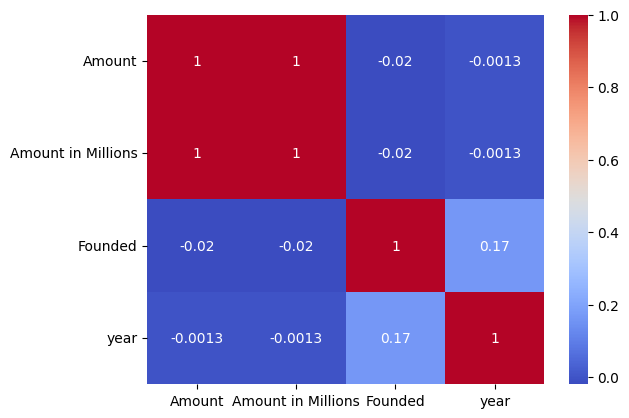

In [223]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

*Hypothesis testing*

Null Hypothesis (Ho):  The sector of a startup has no significant influence on the funding it receives.

Alternate Hypothesis (Ha): The sector of a startup has significant influence the funding it receives.

In [ ]:
%pip install statsmodels

In [224]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Using a threshold of 0.05 check if other factors affect the amount received/funded using ANOVA
threshold = 0.05

factors= ['Founded','HeadQuarter','Sector','Stage','year']
p_values={}

for factor in factors:
    model = ols('Amount~{}'.format(factor),data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value =  anova_table['PR(>F)'][0]
    p_value_decimal = round(float(p_value),2)
    print(f'{factor}:{p_value_decimal}')

    p_values[factor] = p_value_decimal

    significant_factors=[factor for factor, p_value in p_values.items() if p_value < threshold]
    print("significant factors with p_values below {}: {}".format(threshold, significant_factors))



Founded:0.29
significant factors with p_values below 0.05: []
HeadQuarter:1.0
significant factors with p_values below 0.05: []
Sector:1.0
significant factors with p_values below 0.05: []
Stage:0.0
significant factors with p_values below 0.05: ['Stage']
year:0.95
significant factors with p_values below 0.05: ['Stage']


The test shows different significant values of the various variables.

With the sector p-value at 1 and hence less than 0.05, we reject the null hypothesis.
We can herefore conclude that the sector of a startup has a significant influence on the funding it receives.

In [ ]:

threshold = 0.05
factors= ['Founded','HeadQuarter','Sector','Stage','year']
p_values = {}

for factor in factors:
    model = ols('Amount~{}'.format(factor),data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_values[factor] = anova_table['PR(>F)'][0]

significant_factors=[factor for factor, p_value in p_values.items() if p_value < threshold]
print("significant factors with p_values below {}: {}".format(threshold, significant_factors))

significant factors with p_values below 0.05: ['Stage']


In [222]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

View the distribution of the amount funded

<Axes: xlabel='Amount in Millions', ylabel='Density'>

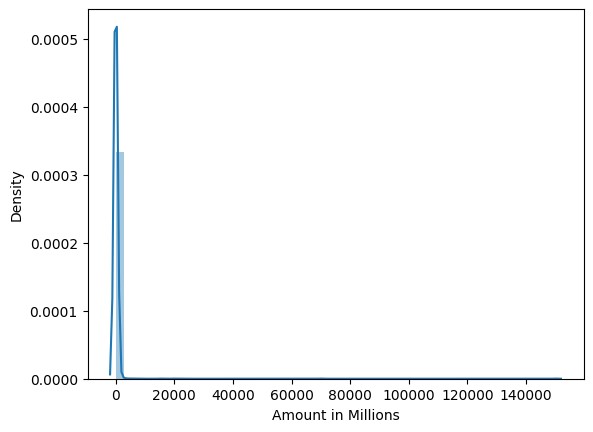

In [294]:
sns.distplot(data['Amount in Millions'])

<Axes: xlabel='Amount', ylabel='Density'>

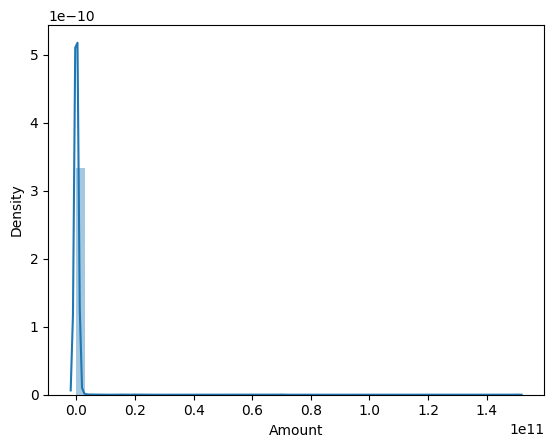

In [295]:
sns.distplot(data['Amount'])


*A box plot to show outliers in the amount funded*

<Axes: xlabel='Amount in Millions'>

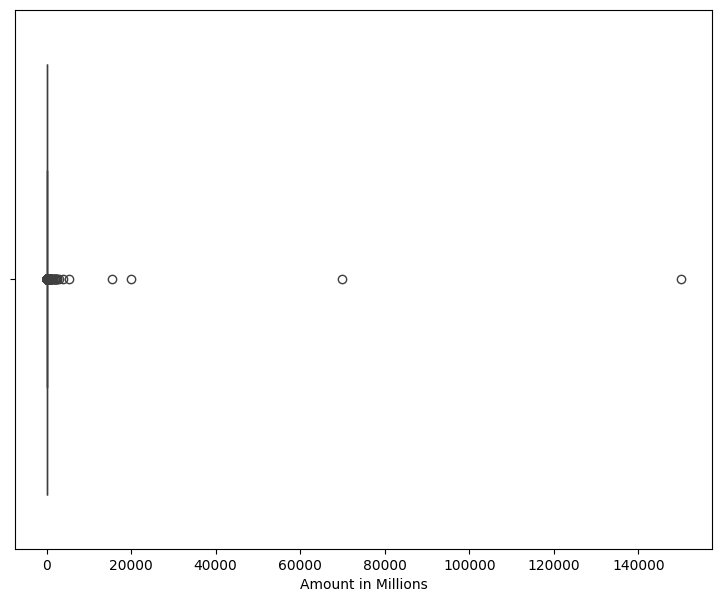

In [296]:
plt.figure(figsize=(9,7))
sns.boxplot(x=data['Amount in Millions'])

The Most common sectors

In [297]:
Most_Common_Sectors=data['Sector'].value_counts()
Most_Common_Sectors

Sector
Technology                                      1883
E-Commerce & Retail                              216
Finance                                          175
Fashion, Sports, Entertainment, Media & Arts     148
Food, Hospitality, Tourism & Travel              105
Transport & Logistics                            105
Other                                             44
Services                                          44
Real Estate                                       40
HealthCare                                        39
Manufacturing                                     18
Education                                         18
Energy & Environment                              17
Agriculture                                        3
Name: count, dtype: int64

As shown above, most startups funded are in the technology sector followed distantly by E-commerce and Finance. 
One may deduce that for a prospective business, technology is a lucrative sector. It can also mean that investors are most likely attracted to invest in the technology sector.

*Plot showing most common sectors*

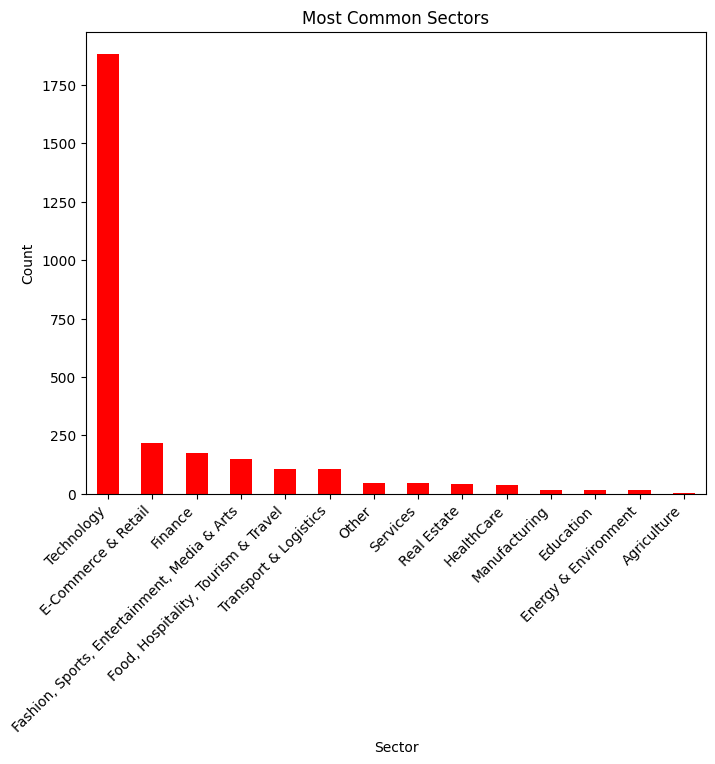

In [298]:
plt.figure(figsize=(8,6))
Most_Common_Sectors.plot(kind = 'bar', color = 'red')
plt.title('Most Common Sectors')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

Most common stage of funding

In [299]:
Most_Common_Stages=data['Stage'].value_counts()
Most_Common_Stages

Stage
Series                   1436
Seed                     1153
Pre-seed                   72
Debt                       60
Angel                      41
Venture                    40
Equity                     14
Bridge                      9
Corporate Round             8
Undisclosed                 7
Grant                       4
Pre-Series                  3
Secondary Market            3
Non-equity Assistance       1
Funding Round               1
Upsparks                    1
Edge                        1
Fresh funding               1
Name: count, dtype: int64

Most startups are in the series stage.

*Plot showing the most common stages*

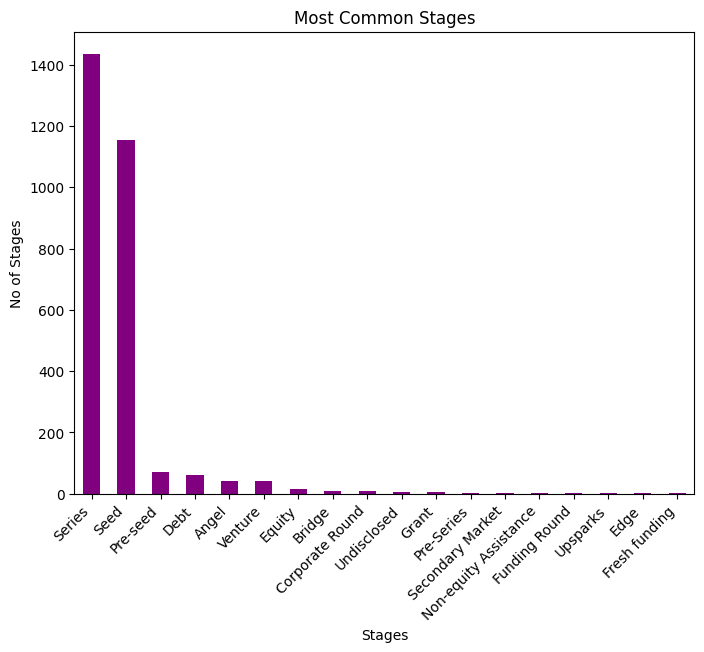

In [300]:
plt.figure(figsize=(8,6))
Most_Common_Stages.plot(kind = 'bar', color = 'purple')
plt.title('Most Common Stages')
plt.xlabel('Stages')
plt.ylabel('No of Stages')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

**Top Investors and they amount they have invested.**

In [301]:
Top_Investor = data.groupby('Investor')['Amount in Millions'].sum().nlargest(10)
Top_Investor

Investor
Inflection Point Ventures                                             151401.925000
Uknown                                                                 91263.761491
Silver Lake, Mubadala Investment Company                               70000.000000
Salesforce Ventures, Dragoneer Investment Group                         3000.000000
Facebook, Google, KKR, Silver Lake                                      2200.000000
Tiger Global                                                            1417.000000
Canaan Valley Capital, Glade Brook Capital Partners                     1000.000000
Falcon Edge, DST Global, D1 Capital, Redbird Capital, Tiger Global       840.000000
Carmignac, Falcon Edge Capital                                           800.000000
General Atlantic, Kohlberg Kravis Roberts                                800.000000
Name: Amount in Millions, dtype: float64

*Plot showing top investors by amount*

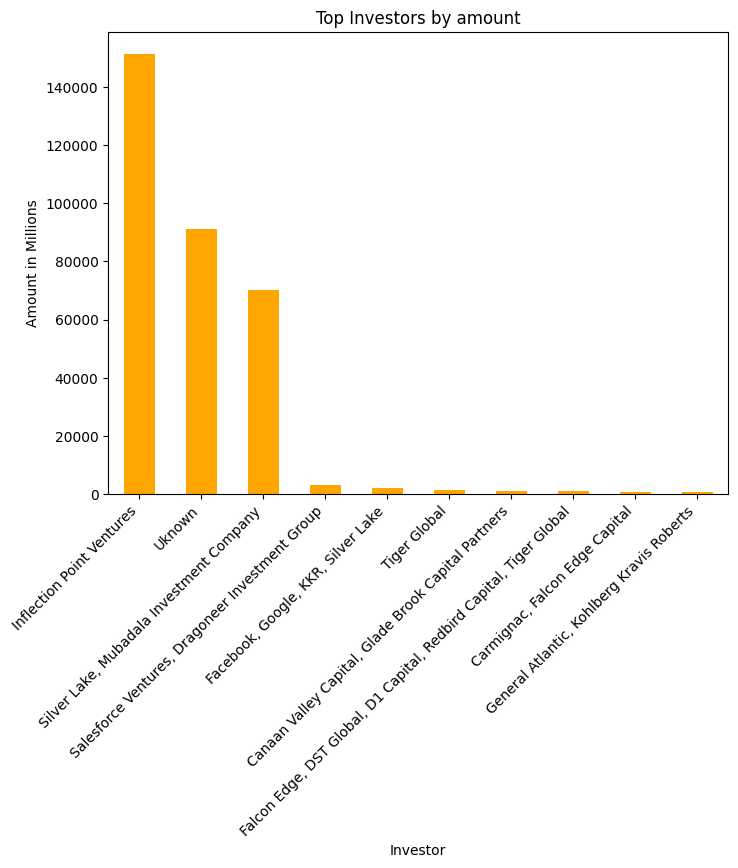

In [302]:
plt.figure(figsize=(8,6))
Top_Investor.plot(kind = 'bar', color = 'Orange')
plt.title('Top Investors by amount')
plt.xlabel('Investor')
plt.ylabel('Amount in Millions')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

The top investor is inflection point ventures.

**Top startup sectors and the funding received**

In [303]:
Amount_By_Sector = data.groupby('Sector')['Amount in Millions'].sum().sort_values(ascending=False)
Amount_By_Sector

Sector
Technology                                      292355.669221
Transport & Logistics                            23303.527546
Finance                                          21500.154000
E-Commerce & Retail                               9116.670800
Fashion, Sports, Entertainment, Media & Arts      4631.128000
Manufacturing                                     3901.454000
Other                                             3725.177000
Food, Hospitality, Tourism & Travel               2930.188500
HealthCare                                        1612.705900
Real Estate                                       1095.182328
Energy & Environment                               859.601000
Services                                           415.935000
Education                                           95.546000
Agriculture                                         29.300000
Name: Amount in Millions, dtype: float64

The technology sector was the most funded.


*Plot showing amount by sector*

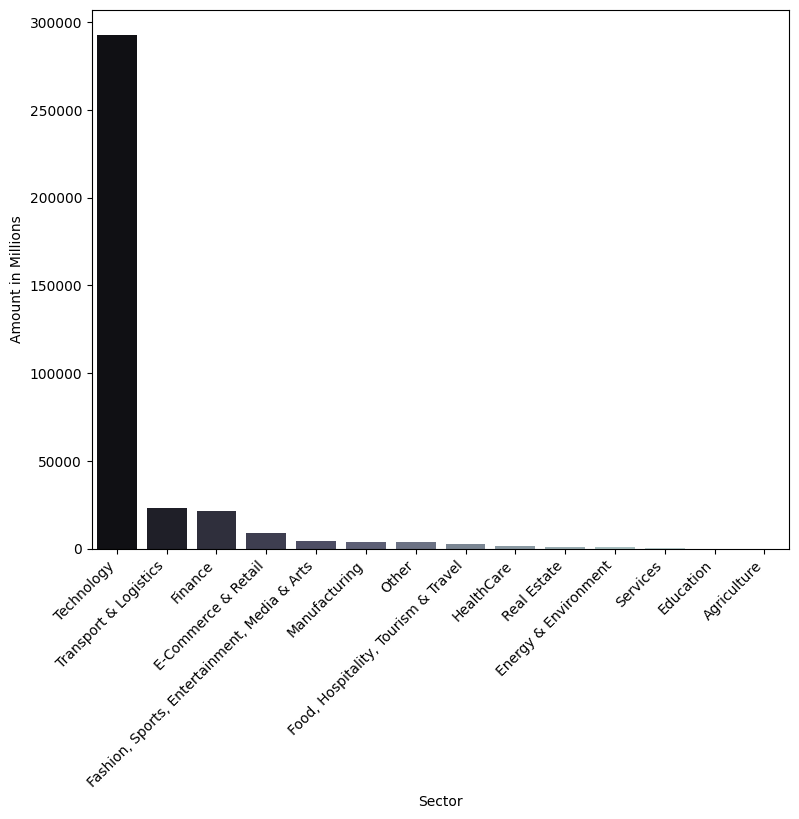

In [304]:
plt.figure(figsize=(9,7))
sns.barplot(x=Amount_By_Sector.index, y=Amount_By_Sector.values, palette='bone')
plt.xlabel('Sector')
plt.ylabel('Amount in Millions')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

**The startup stages and the amount funded.**

In [305]:
Amount_By_Stage = data.groupby('Stage')['Amount in Millions'].sum().sort_values(ascending=False)
Amount_By_Stage


Stage
Debt                     154303.832000
Series                   134543.928174
Equity                    42299.500000
Seed                      23986.739121
Venture                    7818.181000
Secondary Market           1345.800000
Corporate Round             556.400000
Angel                       341.914000
Pre-seed                    112.755000
Grant                       109.510000
Funding Round                50.000000
Pre-Series                   32.000000
Fresh funding                28.000000
Bridge                       21.500000
Undisclosed                  13.600000
Edge                          5.040000
Upsparks                      3.500000
Non-equity Assistance         0.040000
Name: Amount in Millions, dtype: float64

Thoug most startups are in the series stage in terms of numbers, most startups receiving the highest amount of funds are in the debt stage.

*Plot showing the top startup stages and the amount funded*

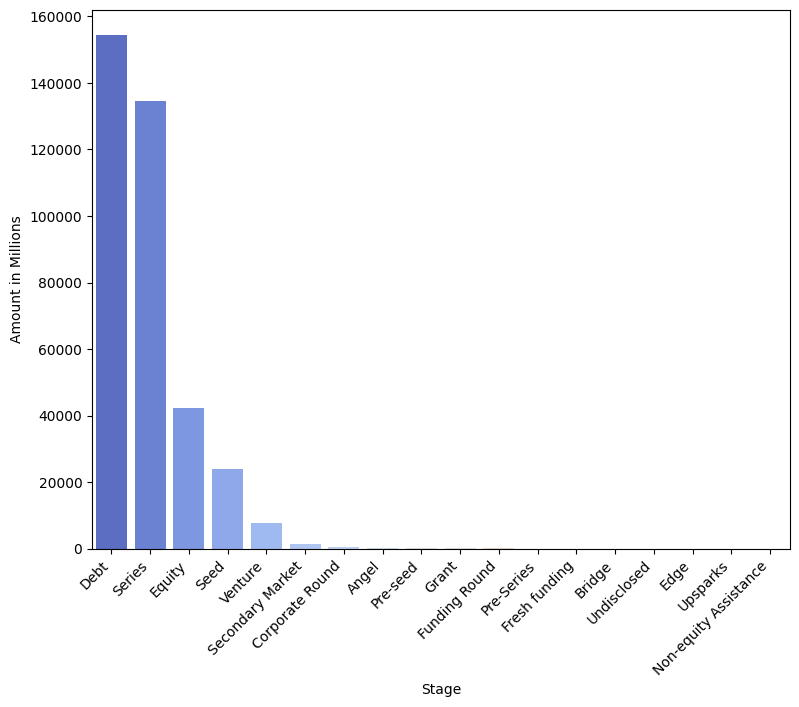

In [306]:
plt.figure(figsize=(9,7))
sns.barplot(x=Amount_By_Stage.index, y=Amount_By_Stage.values, palette='coolwarm')
plt.xlabel('Stage')
plt.ylabel('Amount in Millions')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

1) **How is funding spread across the years?**

 

In [307]:
Funding_Spread = data.groupby('year')['Amount in Millions'].sum()
Funding_Spread

year
2018     91263.761491
2019      3408.433200
2020     90805.818604
2021    180094.226000
Name: Amount in Millions, dtype: float64

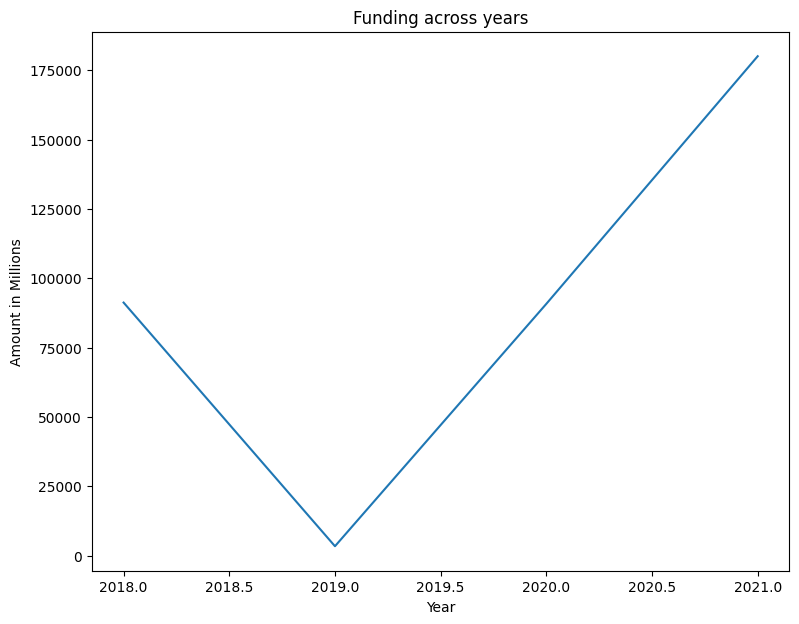

In [308]:
plt.figure(figsize=(9,7))
sns.lineplot(x=Funding_Spread.index, y=Funding_Spread.values, palette='black')
plt.title('Funding across years')
plt.xlabel('Year')
plt.ylabel('Amount in Millions')
plt.show()

The total amount funded is relaively high in 2018 but reduces drastically at the beginning of 2019. However,it increases in 2020 & 2021 surpasing pre 2018 levels. 

2) **Dominant sectors across the years**

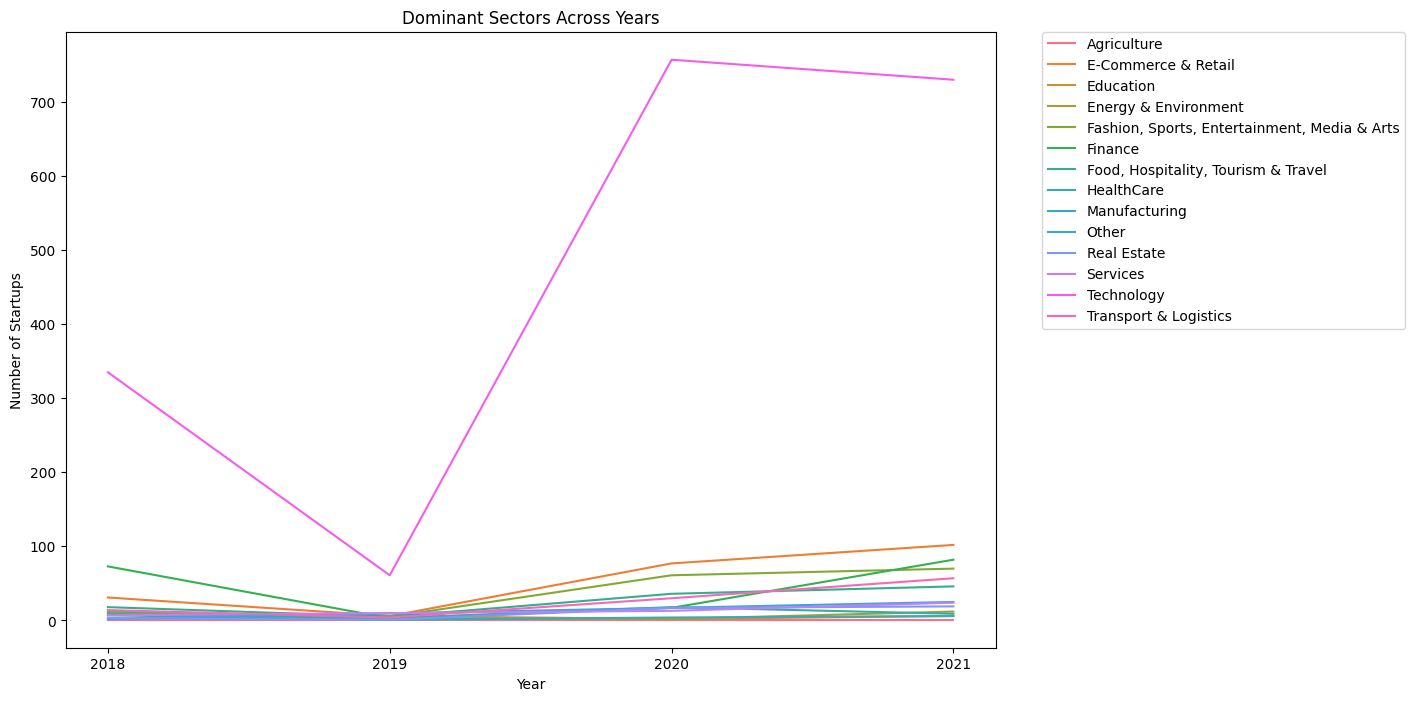

In [311]:
# Group the data by 'Sector' and 'year' and count the number of startups in each sector and year
sector_year_counts = data.groupby(['Sector', 'year']).size().reset_index(name='Count')
sector_year_counts
# Create a pivot table to make it easier to plot the data
pivot_table = sector_year_counts.pivot(index='year', columns='Sector', values='Count')
pivot_table
# Plot the dominant sectors across years using a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=pivot_table,dashes=False)
plt.xticks(pivot_table.index)
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.title('Dominant Sectors Across Years')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Over the years from 2018, the technology sector has been the dominant sector in terms of the number of startups.

3.	**Are there any emerging sectors that have shown a significant increase in funding year over year?**

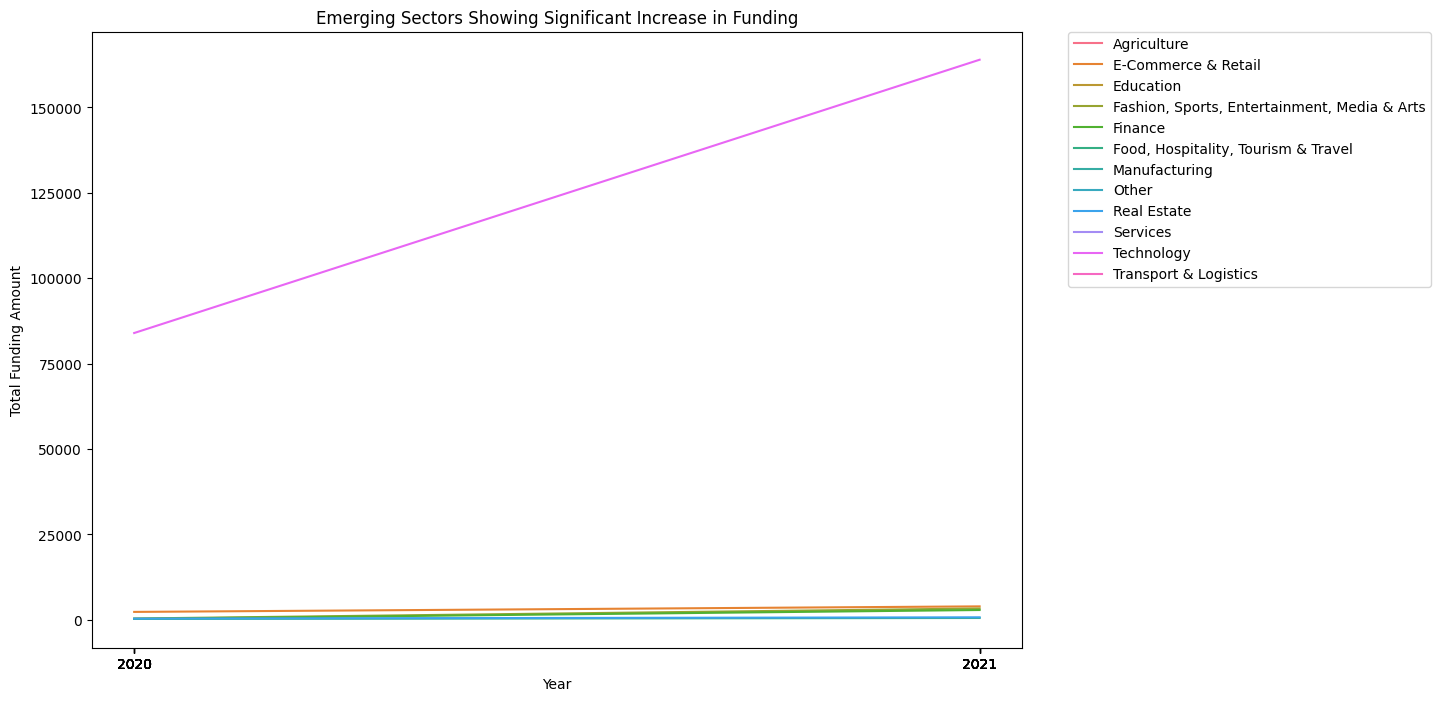

In [312]:
# Calculate the total funding amount for each sector and year
total_funding = data.groupby(['Sector', 'year'])['Amount in Millions'].sum().reset_index()

# Calculate the percentage increase in funding for each sector year over year
total_funding['Percentage Increase'] = total_funding.groupby('Sector')['Amount in Millions'].pct_change() * 100

# Filter out sectors with a significant increase in funding (e.g., > 50%)
emerging_sectors = total_funding[total_funding['Percentage Increase'] > 50]
# 
# Plot the emerging sectors showing significant increase in funding year over year
plt.figure(figsize=(12, 8))
sns.lineplot(data=emerging_sectors, x='year', y='Amount in Millions', hue='Sector')
plt.xticks(emerging_sectors['year'])
plt.xlabel('Year')
plt.ylabel('Total Funding Amount')
plt.title('Emerging Sectors Showing Significant Increase in Funding')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The technology sector has seen a steady increase in funding year-on-year

4.	**Where in India could be considered the surviving grounds for startups?**

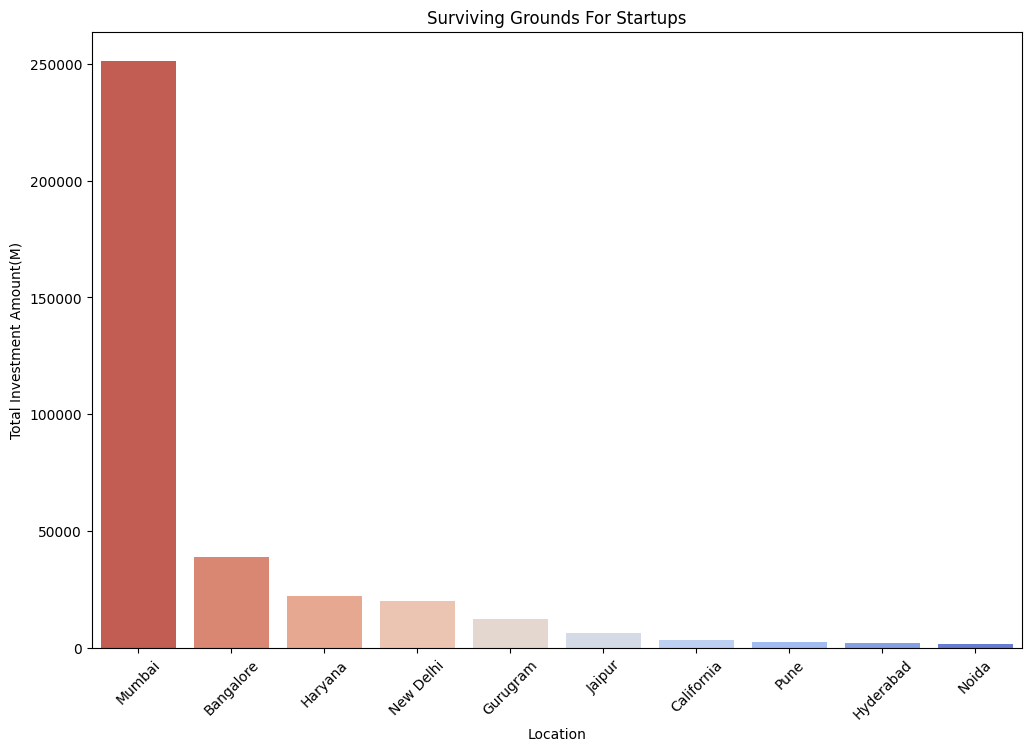

In [313]:
# Calculate the total funding amount for each headquarter
total_investment = data.groupby('HeadQuarter')['Amount in Millions'].sum().reset_index()

# Sort the headquarters by total investment in descending order
sorted_investment = total_investment.sort_values(by='Amount in Millions', ascending=False)

# Plot the headquarters with the most amount invested
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_investment.head(10), x='HeadQuarter', y='Amount in Millions',palette='coolwarm_r')
plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Total Investment Amount(M)')
plt.title('Surviving Grounds For Startups')
plt.show()

A surviving ground can be defined as the location where a startup is most likely to succeed.This can be translated into the location receiving the most funding since investors view a high likelihood of success.
Thus, Mumbai can be said to be the survivng ground for most startups since it has the highest concentration of funding.

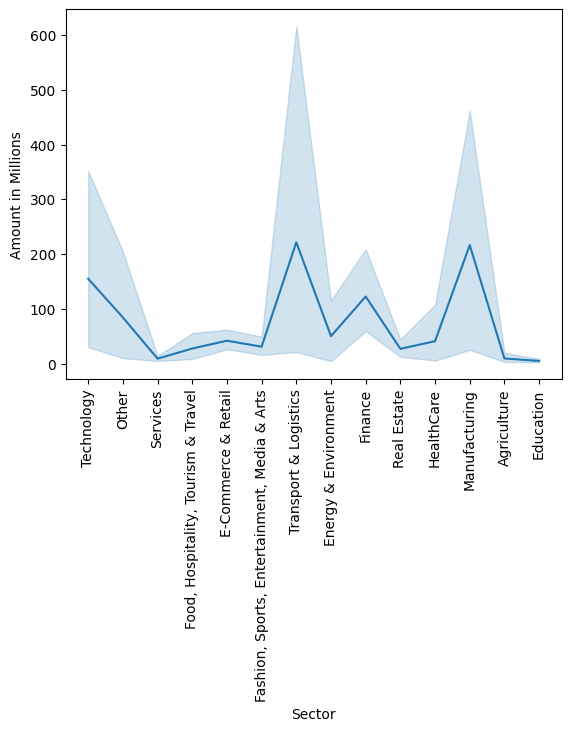

In [315]:
#  Plot a relationship between sector of startup and amount of funding it receives
sns.lineplot(x='Sector', y='Amount in Millions', data=data)
plt.xticks(rotation=90)
plt.show()

5.	**Is there a relationship between what a startup does and the funding it receives?**

In [361]:
# Get the top 20 value counts of 'What_it_does' and their respective 'Amount'
top_20_what_it_does = data['What_it_does'].value_counts().head(20)

# Create a new dataframe with the top 20 'What_it_does' values
top_20_df = data[data['What_it_does'].isin(top_20_what_it_does.index)]
top_20_df
# Group the dataframe by 'What_it_does' and calculate the sum of 'Amount' for each group
top_20_amounts = top_20_df.groupby('What_it_does')['Amount in Millions'].sum()
top_20_amounts
# Combine the 'What_it_does' and 'Amount' series into a dataframe
top_20_combined = pd.DataFrame({'What_it_does': top_20_what_it_does, 'Amount in Millions': top_20_amounts})
top_20_combined 
# Sort the dataframe by 'Amount' in descending order
Nature_funding=top_20_combined.sort_values(by='Amount in Millions', ascending=False)
Nature_funding


,What_it_does,Amount in Millions
What_it_does,,
BYJU'S is an educational technology company that develops personalized learning programs for K-12 students.,5,1210.0000
Provides online learning classes,5,1065.0000
Offers a variety of bikes and scooters that can be rented on a subscription basis,3,209.0000
Digital payments platform,2,175.0000
Onine learning platform,4,143.3000
Freshtohome is an e-commerce platform for fresh and chemical-free seafood.,3,140.0000
BharatPe develops a QR code-based payment app for offline retailers and businesses.,4,124.2000
Enables to order food online,2,124.0000
Mobile Premier League is a skill-based eSports platform used to offer cash prizes while playing games.,4,105.5000


In [380]:
Nature_funding.corr()

,What_it_does,Amount in Millions
What_it_does,1.000000,0.706875
Amount in Millions,0.706875,1.000000


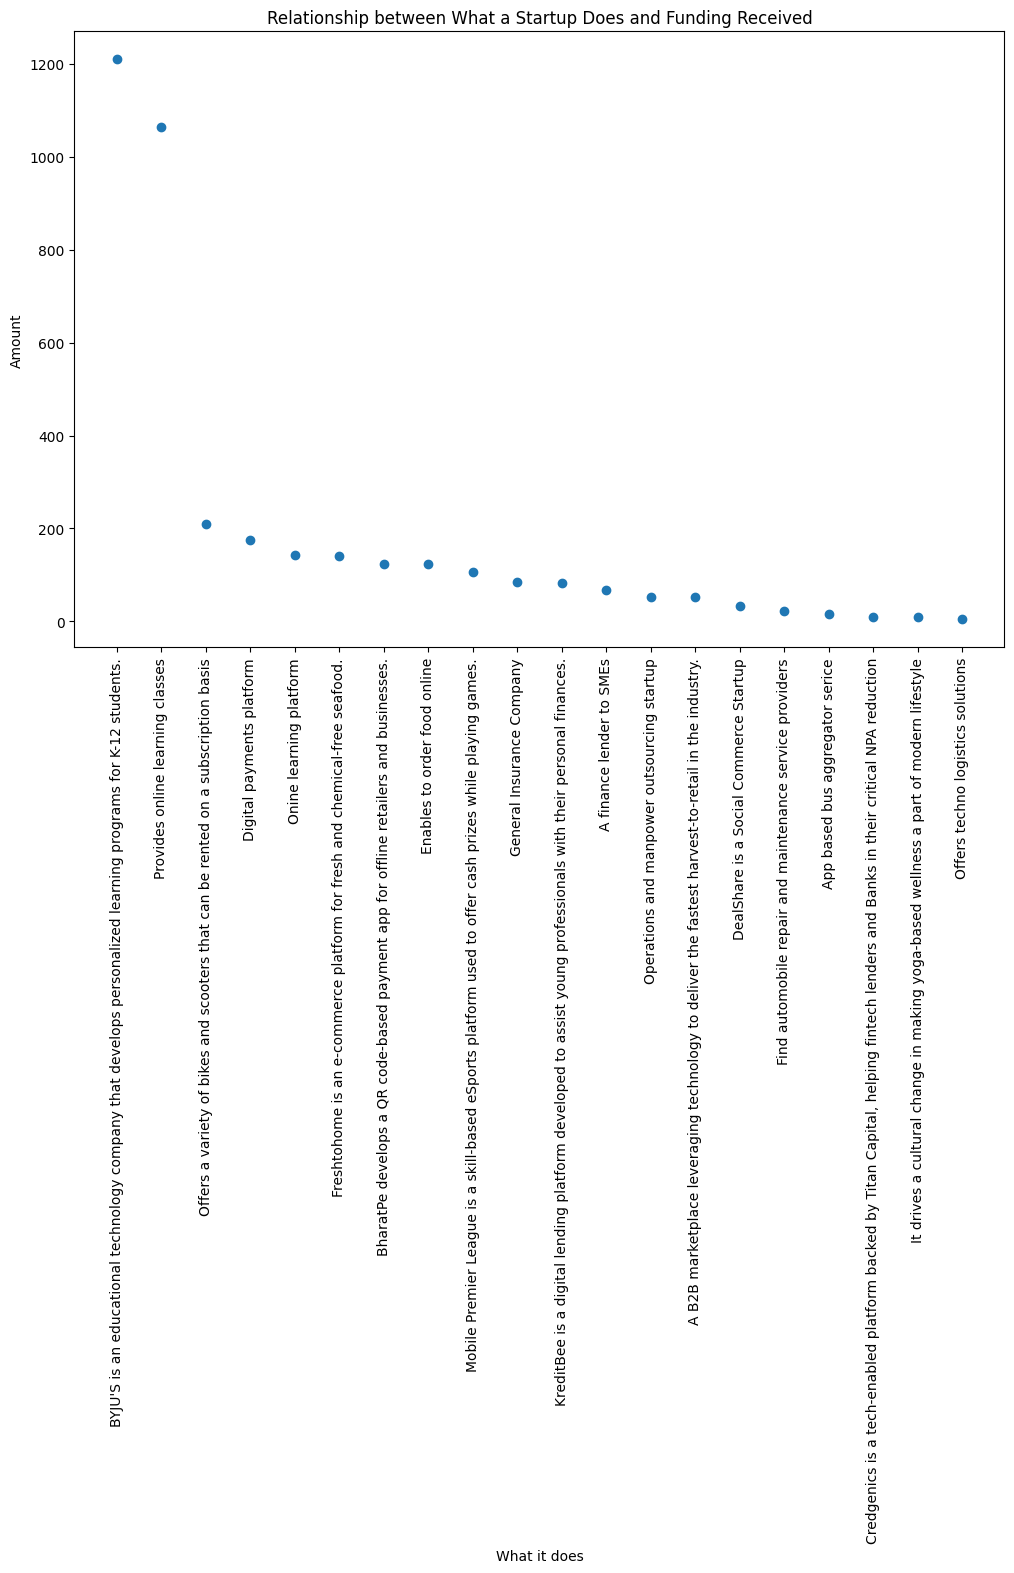

In [379]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(Nature_funding.index, Nature_funding['Amount in Millions'])

# Set the labels and title
plt.xlabel('What it does')
plt.ylabel('Amount')
plt.title('Relationship between What a Startup Does and Funding Received')
plt.xticks(rotation=90)
# Show the plot
plt.show()

Going by both the correlation (0.7) and the scatter plot,there is a high correlation between what a startup does and the funding it receives.If what a startup does is prevalent, the higher the funding it is likely to receive.

In [382]:
data.to_csv('clean_data.csv',index=False)